In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Charger les données de monitoring des cultures
monitoring_data = pd.read_csv('C:/Users/dell/OneDrive/Bureau/projet_culture/data/monitoring_cultures.csv')
print("Monitoring Cultures :")
print(monitoring_data.head())

# Charger les données météorologiques
weather_data = pd.read_csv('C:/Users/dell/OneDrive/Bureau/projet_culture/data/meteo_detaillee.csv')
print("\nMétéo Détaillee :")
print(weather_data.head())

# Charger les données des sols
soil_data = pd.read_csv('C:/Users/dell/OneDrive/Bureau/projet_culture/data/sols.csv')
print("\nSols :")
print(soil_data.head())

# Charger l'historique des rendements
yield_history = pd.read_csv('C:/Users/dell/OneDrive/Bureau/projet_culture/data/historique_rendements.csv')
print("\nHistorique des Rendements :")
print(yield_history.head())

Monitoring Cultures :
         date parcelle_id culture   ndvi   lai  stress_hydrique  \
0  2024-03-13        P001    Mais  0.352  0.42            0.052   
1  2024-03-14        P001    Mais  0.418  0.48            0.059   
2  2024-03-15        P001    Mais  0.392  0.98            0.035   
3  2024-03-16        P001    Mais  0.447  1.06            0.028   
4  2024-03-17        P001    Mais  0.511  0.56            0.036   

   biomasse_estimee  latitude  longitude  
0              1.48  33.85115  -5.524178  
1              1.99  33.85115  -5.524178  
2              3.84  33.85115  -5.524178  
3              4.72  33.85115  -5.524178  
4              2.86  33.85115  -5.524178  

Météo Détaillee :
                  date  temperature  humidite  precipitation  \
0  2020-01-01 00:00:00         6.97     83.49            0.0   
1  2020-01-01 01:00:00         5.61     86.95            0.0   
2  2020-01-01 02:00:00         5.41     95.00            0.0   
3  2020-01-01 03:00:00         1.93     95

In [3]:
# Dimensions des datasets
print(f"Monitoring Cultures: {monitoring_data.shape}")
print(f"Météo Détaillee: {weather_data.shape}")
print(f"Sols: {soil_data.shape}")
print(f"Historique des Rendements: {yield_history.shape}")


Monitoring Cultures: (14652, 9)
Météo Détaillee: (43848, 7)
Sols: (50, 11)
Historique des Rendements: (250, 4)


In [4]:
# Vérification des valeurs manquantes
print("Valeurs manquantes (Monitoring Cultures):")
print(monitoring_data.isnull().sum())

print("\nValeurs manquantes (Météo Détaillee):")
print(weather_data.isnull().sum())

print("\nValeurs manquantes (Sols):")
print(soil_data.isnull().sum())

print("\nValeurs manquantes (Historique des Rendements):")
print(yield_history.isnull().sum())


Valeurs manquantes (Monitoring Cultures):
date                0
parcelle_id         0
culture             0
ndvi                0
lai                 0
stress_hydrique     0
biomasse_estimee    0
latitude            0
longitude           0
dtype: int64

Valeurs manquantes (Météo Détaillee):
date                   0
temperature            0
humidite               0
precipitation          0
rayonnement_solaire    0
vitesse_vent           0
direction_vent         0
dtype: int64

Valeurs manquantes (Sols):
parcelle_id               0
latitude                  0
longitude                 0
type_sol                  0
surface_ha                0
capacite_retention_eau    0
ph                        0
matiere_organique         0
azote                     0
phosphore                 0
potassium                 0
dtype: int64

Valeurs manquantes (Historique des Rendements):
parcelle_id    0
annee          0
culture        0
rendement      0
dtype: int64


In [5]:
# Types de données
print("Types de données (Monitoring Cultures):")
print(monitoring_data.dtypes)

print("\nTypes de données (Météo Détaillee):")
print(weather_data.dtypes)

print("\nTypes de données (Sols):")
print(soil_data.dtypes)

print("\nTypes de données (Historique des Rendements):")
print(yield_history.dtypes)


Types de données (Monitoring Cultures):
date                 object
parcelle_id          object
culture              object
ndvi                float64
lai                 float64
stress_hydrique     float64
biomasse_estimee    float64
latitude            float64
longitude           float64
dtype: object

Types de données (Météo Détaillee):
date                    object
temperature            float64
humidite               float64
precipitation          float64
rayonnement_solaire    float64
vitesse_vent           float64
direction_vent         float64
dtype: object

Types de données (Sols):
parcelle_id                object
latitude                  float64
longitude                 float64
type_sol                   object
surface_ha                float64
capacite_retention_eau    float64
ph                        float64
matiere_organique         float64
azote                     float64
phosphore                 float64
potassium                 float64
dtype: object

Types de do

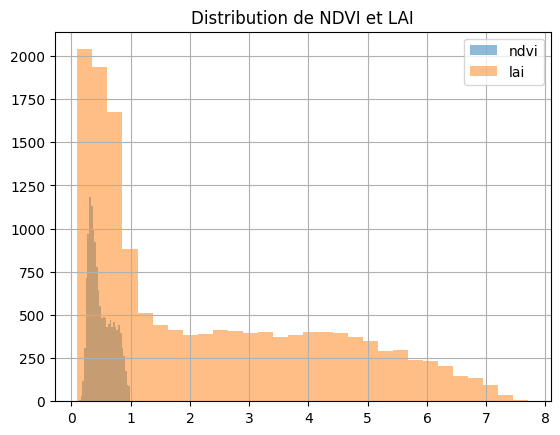

In [6]:
# Histogramme NDVI et LAI
monitoring_data['ndvi'].hist(bins=30, alpha=0.5, label='ndvi')
monitoring_data['lai'].hist(bins=30, alpha=0.5, label='lai')
plt.legend()
plt.title('Distribution de NDVI et LAI')
plt.show()


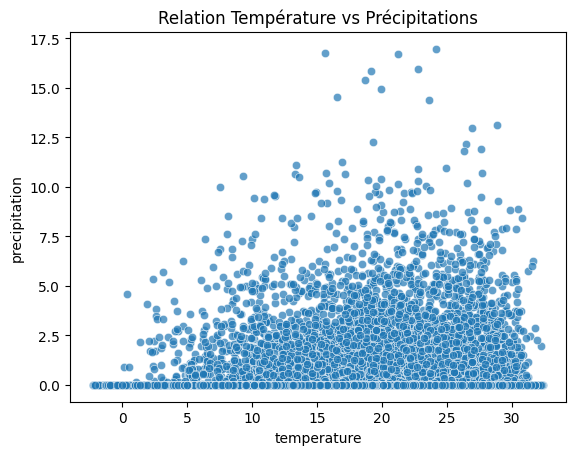

In [7]:
# Précipitations vs Température
sns.scatterplot(data=weather_data, x='temperature', y='precipitation', alpha=0.7)
plt.title('Relation Température vs Précipitations')
plt.show()


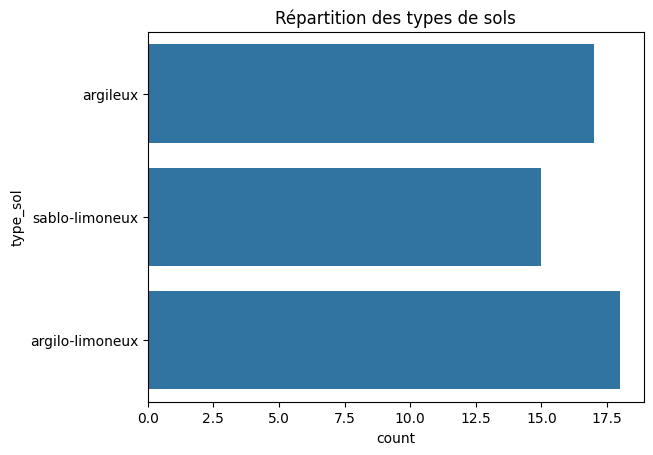

In [8]:
# Répartition des types de sols
sns.countplot(data=soil_data, y='type_sol')
plt.title('Répartition des types de sols')
plt.show()


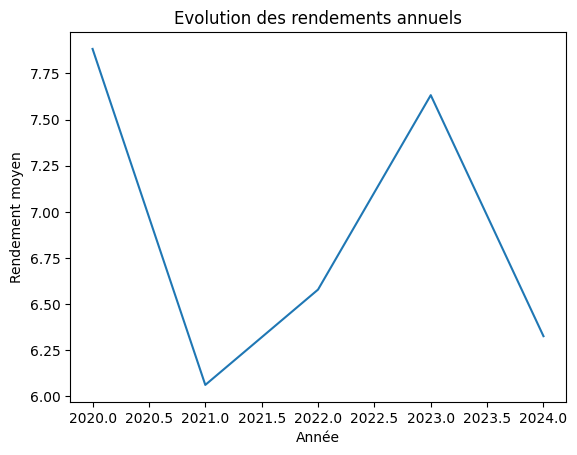

In [9]:
# Rendements par année
yield_history.groupby('annee')['rendement'].mean().plot(kind='line')
plt.title('Evolution des rendements annuels')
plt.xlabel('Année')
plt.ylabel('Rendement moyen')
plt.show()


In [10]:
# Fusionner monitoring_data avec weather_data sur la date
merged_data = pd.merge(monitoring_data, weather_data, on='date', how='left')


In [11]:
# Supposons que merged_data est votre DataFrame et que la colonne de date s'appelle 'date'
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Créer une nouvelle colonne pour la date seulement
merged_data['date_only'] = merged_data['date'].dt.date

# Créer une nouvelle colonne pour l'heure seulement
merged_data['time_only'] = merged_data['date'].dt.time

# Afficher les premières lignes pour vérifier
print(merged_data.head())


        date parcelle_id culture   ndvi   lai  stress_hydrique  \
0 2024-03-13        P001    Mais  0.352  0.42            0.052   
1 2024-03-14        P001    Mais  0.418  0.48            0.059   
2 2024-03-15        P001    Mais  0.392  0.98            0.035   
3 2024-03-16        P001    Mais  0.447  1.06            0.028   
4 2024-03-17        P001    Mais  0.511  0.56            0.036   

   biomasse_estimee  latitude  longitude  temperature  humidite  \
0              1.48  33.85115  -5.524178          NaN       NaN   
1              1.99  33.85115  -5.524178          NaN       NaN   
2              3.84  33.85115  -5.524178          NaN       NaN   
3              4.72  33.85115  -5.524178          NaN       NaN   
4              2.86  33.85115  -5.524178          NaN       NaN   

   precipitation  rayonnement_solaire  vitesse_vent  direction_vent  \
0            NaN                  NaN           NaN             NaN   
1            NaN                  NaN           NaN       